## Customer Segmentaiton & Clustering
I want to identify the most important shopping groups based on income, age, and the mall shopping score. I will use 200 unique customer data and divide the mall target market into approachable groups. Then I will create subsets of a market based on demographics behavioral crieteria to better understand the target for marketing activities.

### Pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Univariate Analysis

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

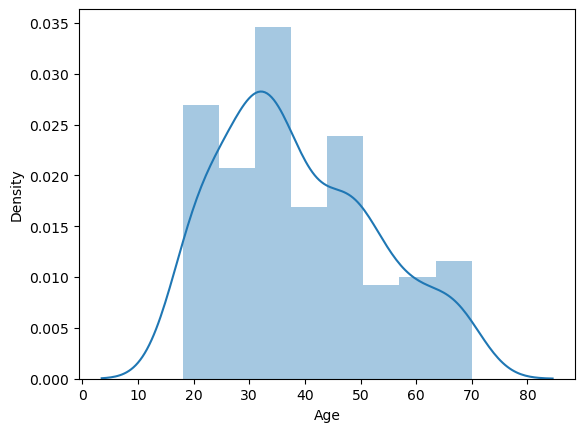

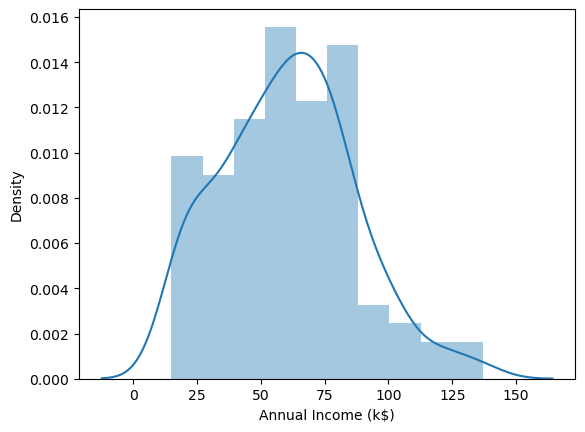

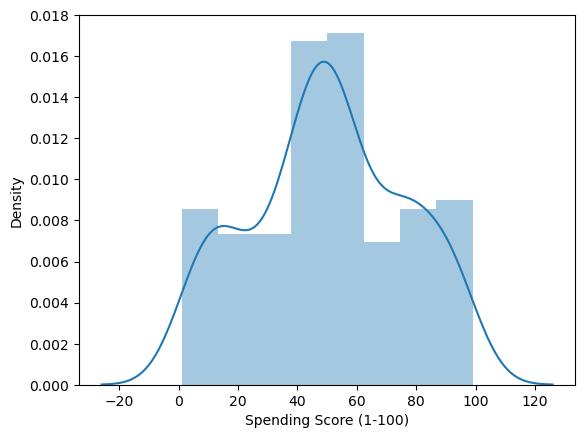

In [5]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

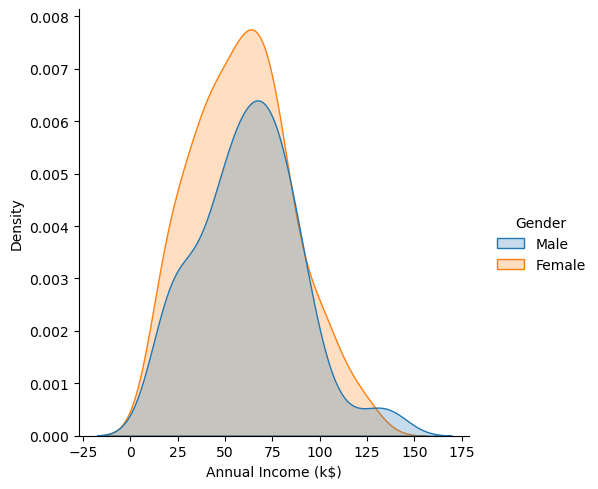

In [6]:
sns.displot(data = df, x = 'Annual Income (k$)', kind = 'kde', hue = 'Gender', fill = True)

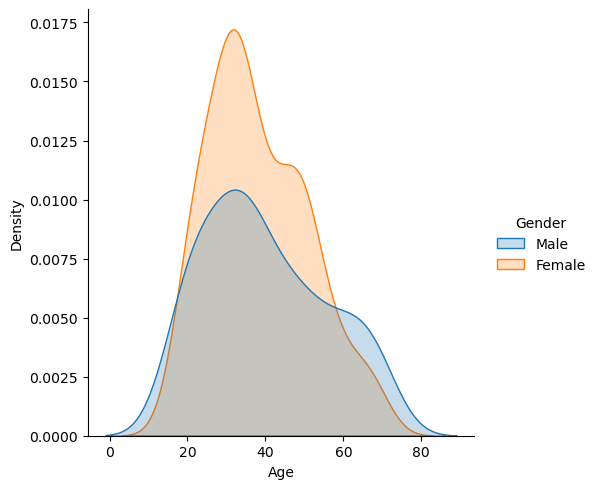

In [7]:
sns.displot(data = df, x = 'Age', kind = 'kde', hue = 'Gender', fill = True)

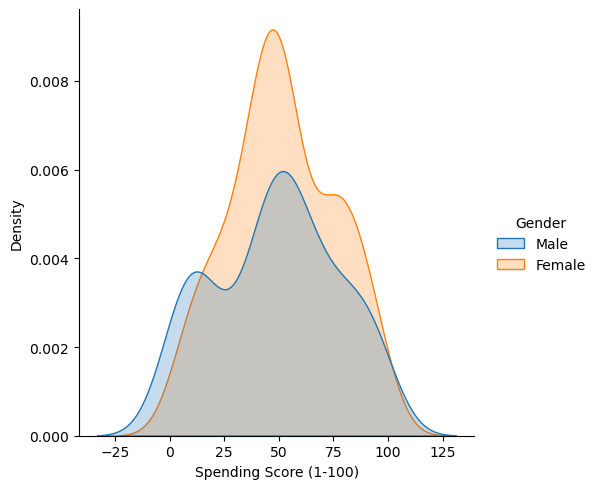

In [8]:
sns.displot(data = df, x = 'Spending Score (1-100)', kind = 'kde', hue = 'Gender', fill = True)

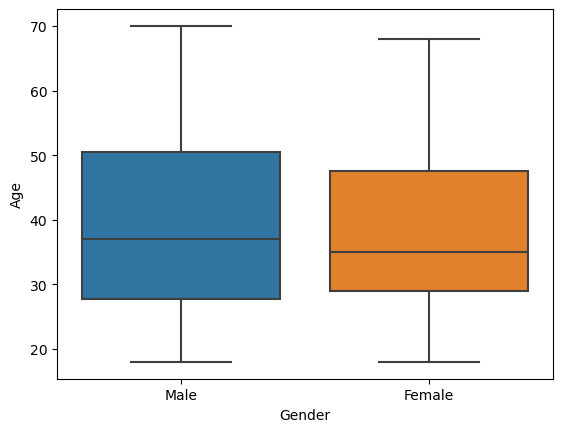

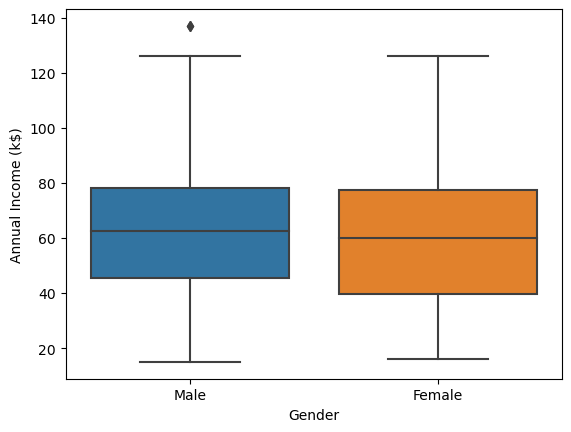

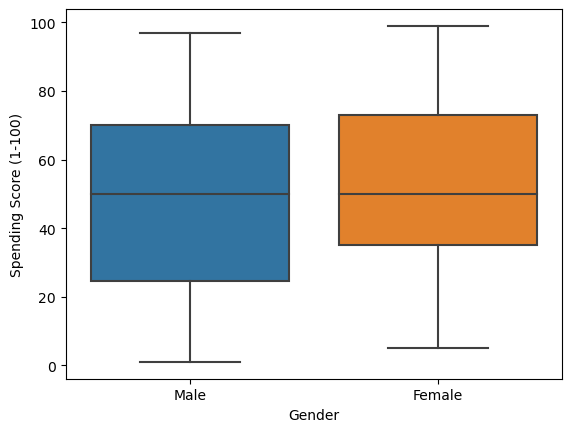

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df,x = 'Gender',y = df[i])

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

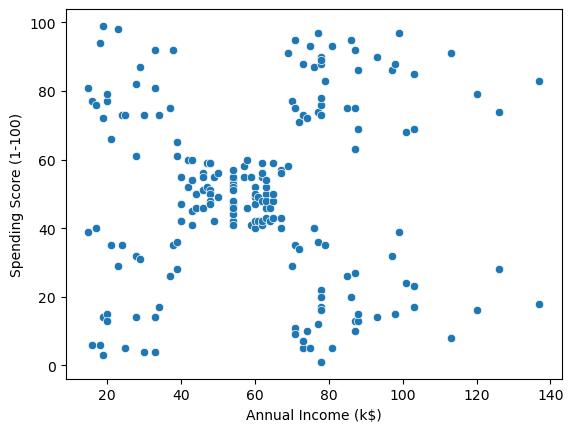

In [11]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

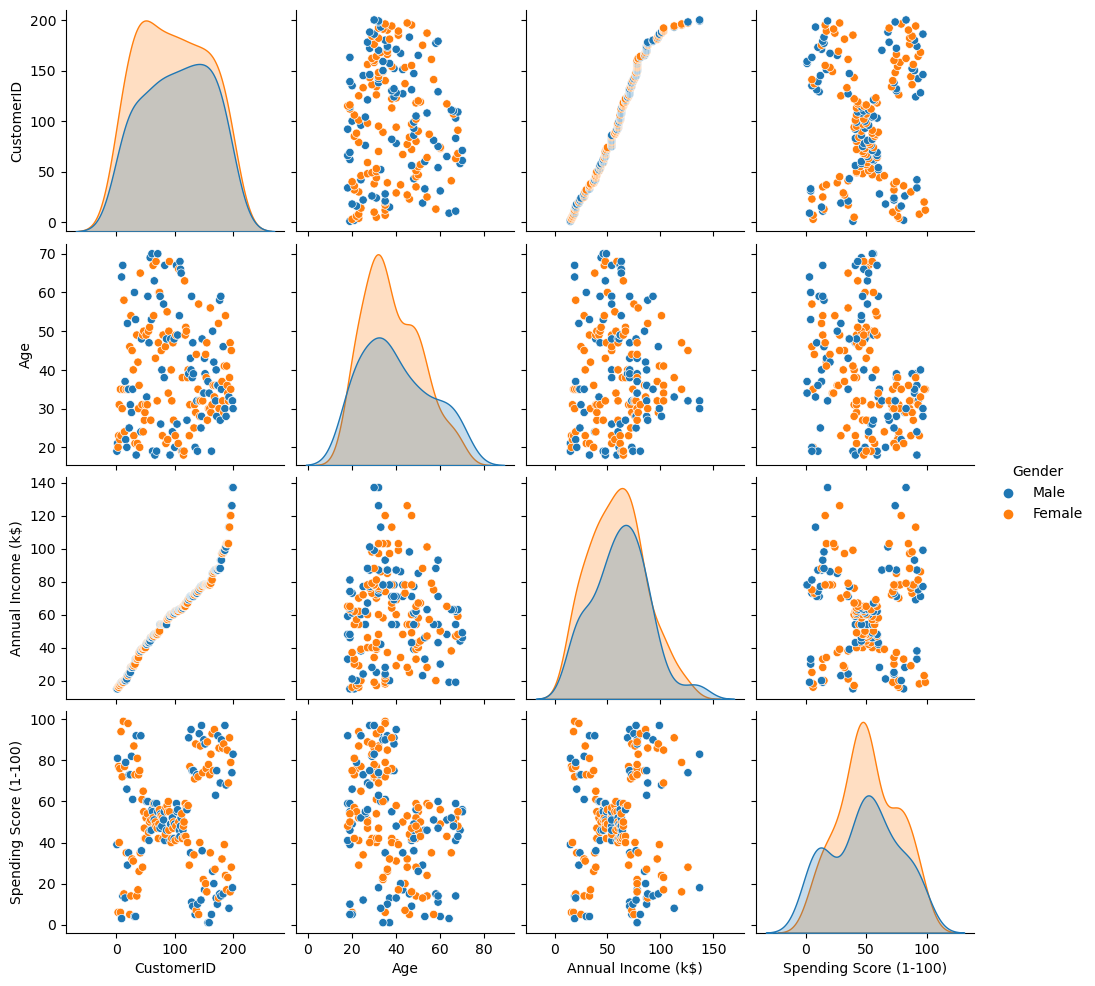

In [12]:
sns.pairplot(df, hue = 'Gender')

In [13]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

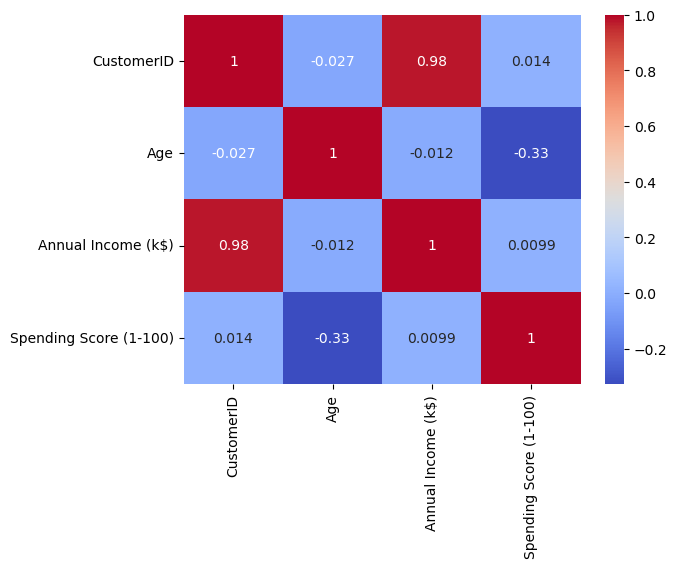

In [15]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### Clustering

#### Univariate

In [16]:
clustering1 = KMeans(n_clusters = 3)

In [17]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
df['Income Cluster'] = clustering1.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


In [20]:
df['Income Cluster'].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [21]:
clustering1.inertia_

23528.152173913048

In [22]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [23]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 23528.152173913048,
 13278.112713472487,
 8481.496190476191,
 5050.9047619047615,
 3949.275613275614,
 2841.1487179487185,
 2208.812049062049,
 1734.1677489177491]

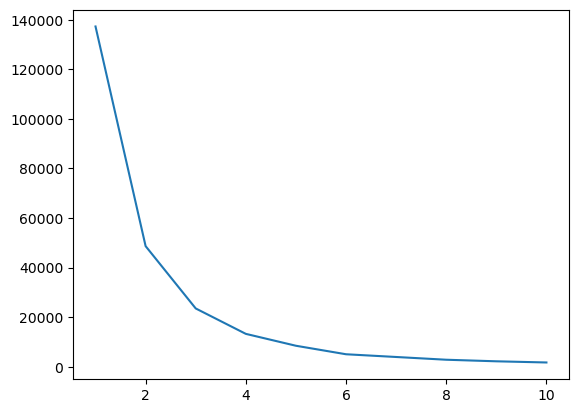

In [24]:
plt.plot(range(1, 11), inertia_scores)

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [26]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


#### Bivariate

In [27]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


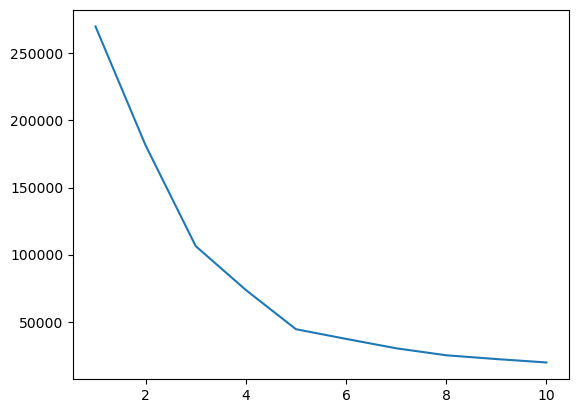

In [28]:
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1, 11), inertia_scores2)

In [29]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

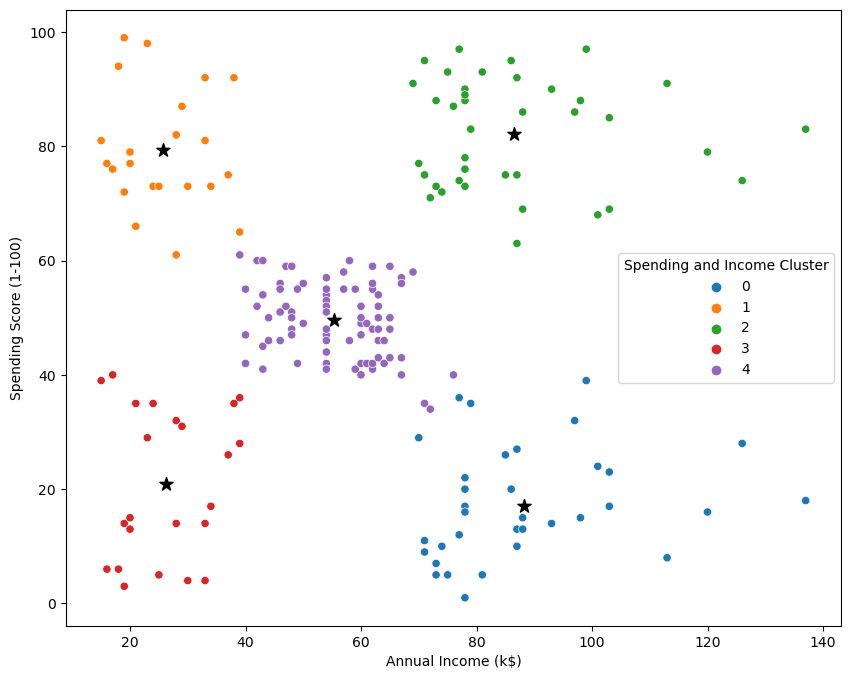

In [30]:
plt.figure(figsize = (10, 8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')
plt.savefig('clustering_bivariate.png')

In [31]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.538462,0.461538
3,0.608696,0.391304
4,0.592593,0.407407


In [32]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


#### Multivariate Clustering

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


In [36]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,1,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,1,0
4,5,31,17,40,1,3,0


In [37]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [38]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [39]:
dff = scale.fit_transform(dff)

In [40]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


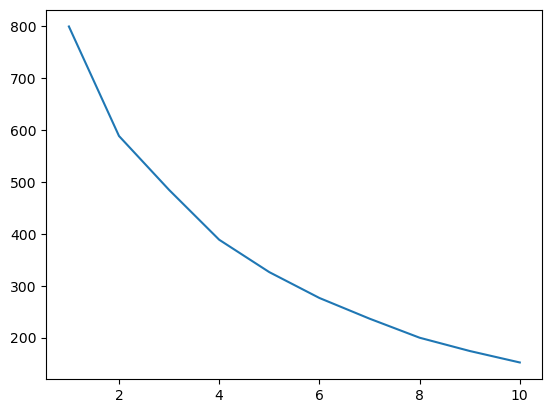

In [41]:
inertia_scores3 = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1, 11), inertia_scores3)

In [42]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,0


In [43]:
df.to_csv('Clustering.csv')

### Analysis

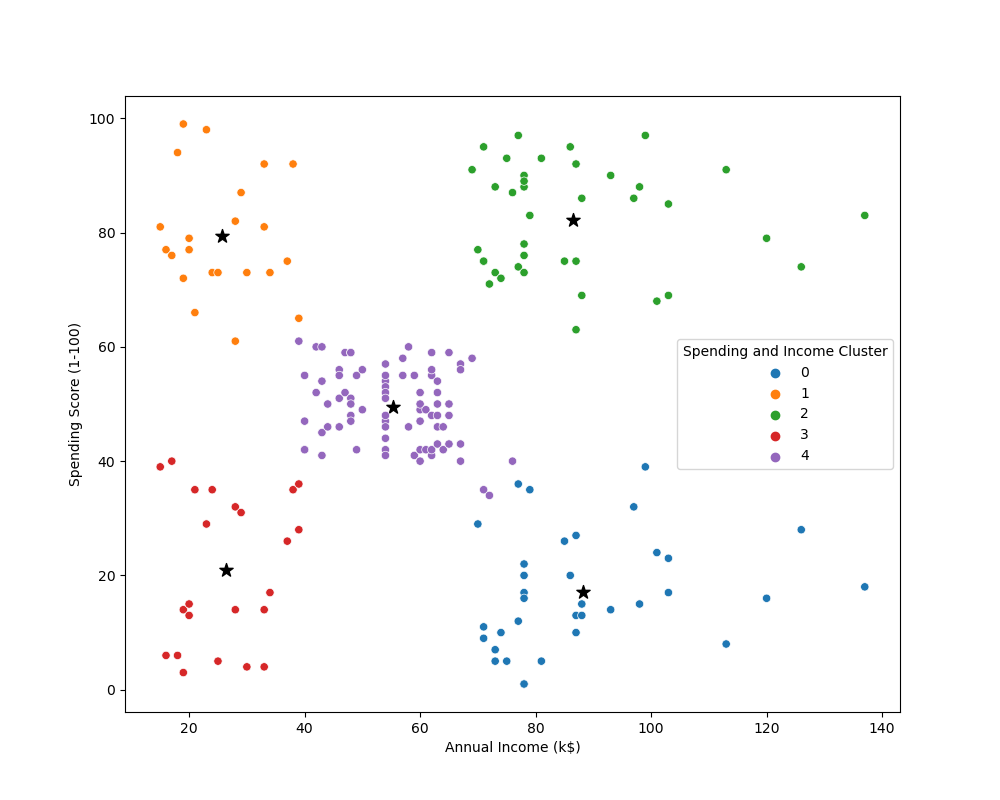

In [44]:
from IPython.display import display
from PIL import Image

# Load the image into a PIL Image object
image = Image.open('clustering_bivariate.png')

# Display the image
display(image)

- Cluster 2 is the target group because they have a high spending score and annual income
- 54% of Cluster 2 shoppers are women. We could look for a way to attract this demographic using a marketing campaing targeting popular items in this cluster
- Cluster 1 presents an interesting opportunity to market to the customers for sales event on popular items

If we can match the customer IDs in the aforementioned clusters with the products they bought we could create a robust marketing campaign.